# Исследование данных о продаже игр

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

### Откроем файл и изучим общую информацию 

Для начала, импортируем необходимые библиотеки и загрузим данные в переменную `data`.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверим данные на наличие пропусков.

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Данные имеют пропуски в нескольких столбцах. Позже, нужно будет решить, что с ними делать.

### Предобработка данных

#### Изменение названий столбцов

Приведём названия столбцов к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Изменение типов данных

##### Столбец `'year_of_release'` 

Год релиза приведём к целочисленному типу, год не может быть дробным.

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64') 
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64

##### Столбец `'user_score'`

В этом столбце есть значение 'tbd'. Оно расшифровывается, как "To be determined", или "Будет определенно". Посмотрим какие строки имеют такое значение:

In [8]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В таблице со значениями 'tbd' есть игры, которые вышли уже очень давно, но пользовательская оценка так и не была установлена, и вряд ли будет установлена в будущем. Можем привести весь столбец к типу данных `float64` методом `'to_numeric()'`, и поставить параметр `errors='coerce'`. Значения 'tbd' заменятся на `Nan`

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'].isna().sum()

9125

Значения 'tbd' заменились на `'Nan'`

#### Обработка пропусков

##### Столбцы `'name'` и `'genre'`

Выведем 2 строки с пропущенными значениями в данных столбцах:

In [10]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Обе эти строки имеют пропуск и в стобце `'name'` и в столбце `'genre'`. В них практически нет никаких данных, мы можем спокойно от них избавиться. Таким образом, избавимся от пропусках сразу в двух столбцах.

In [11]:
data = data.dropna(subset=['name'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

##### Столбец `'rating'`

Пропущенные значения в столбце `'rating'` заполним значением "Not rated":

In [12]:
data['rating'] = data['rating'].fillna('Not rated')

In [13]:
print(data['rating'].isna().sum())
data['rating'].unique()

0


array(['E', 'Not rated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

##### Столбцы `'year_of_release'`, `'critic_score'` и `'user_score'`

Заполнять столбец с годом релиза медианным или средним значением не имеет никакого смысла. Это временная характеристика, точно её никак не получится заполнить.  
Пропущенные значения в столбцах с оценкой, также, никак не получится заполнить надёжно. Игры бывают разные, хорошие и плохие, даже в рамках одной платформы, жанра и т.д. Даже высокие продажи не всегда могут указать на хорошее качество игры: игры от популярных издателей могут очень хорошо продаться, однако по итогу иметь плохие оценки.

#### Столбец `'total_sales'`

Добавим новый столбец `'total_sales'`, обозначающий суммарные продажи по всем регионам.

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not rated,31.38


### Исследовательский анализ данных

#### Посмотрим кол-во выпущенных игр по годам

In [15]:
print(data['year_of_release'].min(), data['year_of_release'].max())

1980 2016


В данных представлена информация об играх выпущенных в период с 1980 по 2016 года.

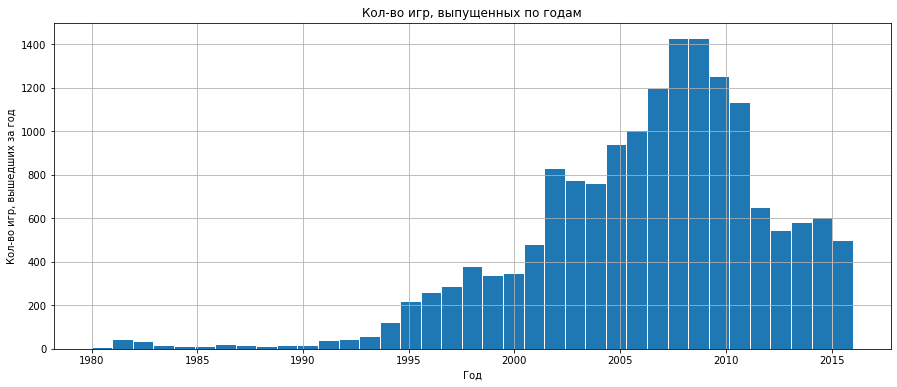

In [16]:
data['year_of_release'].plot(bins=37,
                             kind='hist',
                             grid=True,
                             ec='white',
                             figsize=(15, 6))
plt.ylabel('Кол-во игр, вышедших за год')
plt.xlabel('Год')
plt.title('Кол-во игр, выпущенных по годам');

#### График с изменением продаж по платформам. Выбор актуального периода. Прогнозирование потенциально прибыльных платформ.

Построим график с изменением суммарных продаж видеоигр для каждой платформы в течение времени. Вычислим средний жизненный цикл для игровых платформ и определим актуальный период для выбора самых потенциально прибыльных платформ.

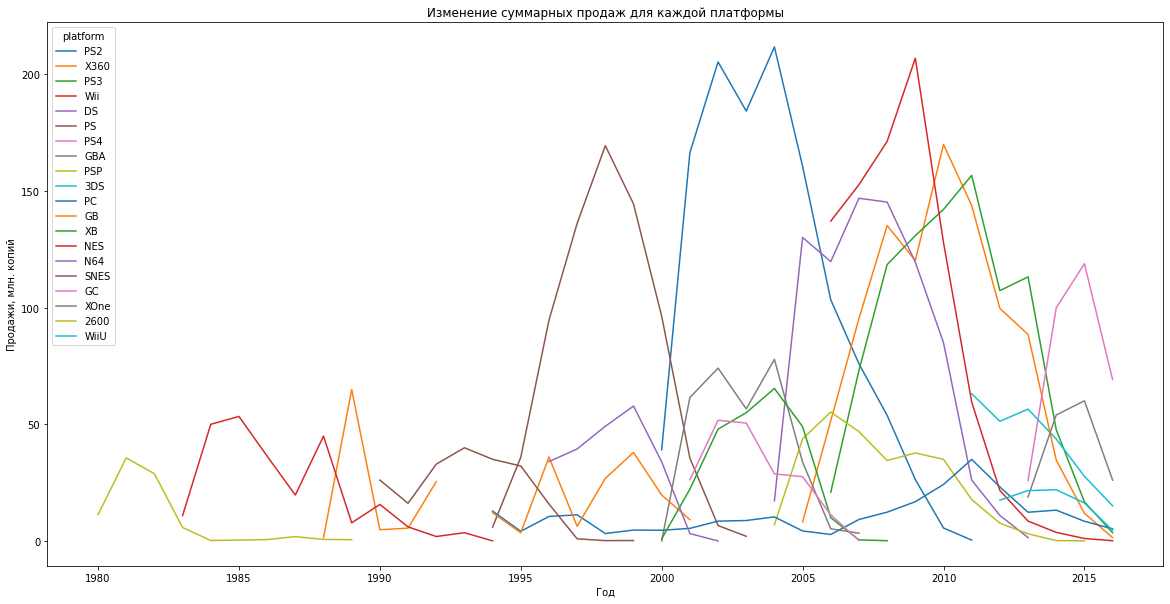

In [17]:
platform_sales = (data.groupby(['platform', 'year_of_release'])['total_sales']
                  .sum()
                  .unstack('platform')
                  .T)
platform_sales['sales_sum'] = platform_sales.apply(axis=1, func='sum')
platform_sales = platform_sales.sort_values(ascending=False, by='sales_sum').head(20).T 
platform_sales = platform_sales.drop('sales_sum')
platform_sales.plot(figsize=(20, 10))
plt.title('Изменение суммарных продаж для каждой платформы')
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Год');

По графику видно, что жизненный цикл платформ редко превышает 10 лет, обычно он составляет около 8 лет. При этом, высокие продажи можно наблюдать ещё меньше времени, в районе 5-6 лет. Так как целью является прогнозирование продаж на 2017 год, мы можем ещё больше уменьшить актуальный период, чтобы старые тренды не влияли на наш прогноз. Возьмём данные с 2013 по 2016 год. Самыми популярными платформами на 2016 год являются Playstation 4, XBOX One и Nintendo 3DS, однако, у всех этих платформ наблюдается снижение продаж. Можем сделать предположение, что у PS4 и XOne ещё вырастут продажи в 2017-2018 годах, так как снижение продаж в 2016 году, скорее всего связано с тем, что данные за этот год неполные. В случае Nintendo 3DS рост продаж маловероятен, так как у этой платформы снижение продаж происходит уже в течение 4 последних лет.

Построим такой же график, но только для выбранного актуального периода:

Text(0, 0.5, 'Продажи, млн. копий')

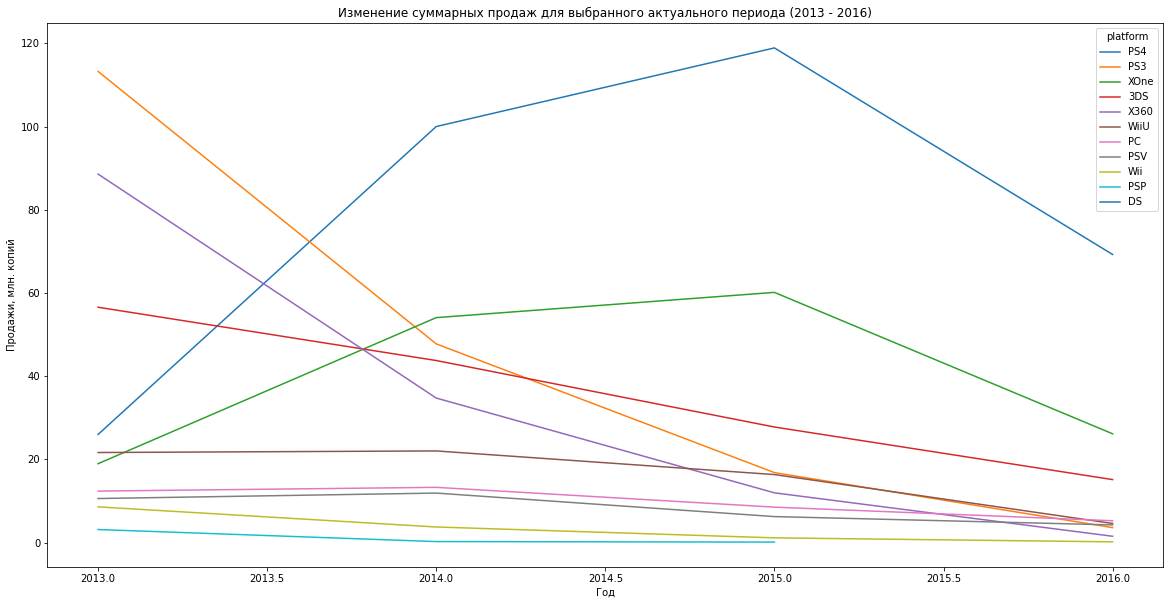

In [18]:
actual = (data.loc[data['year_of_release'] >= 2013].groupby(['platform', 'year_of_release'])['total_sales']
                  .sum()
                  .unstack('platform')
                  .T)
actual['sales_sum'] = actual.apply(axis=1, func='sum')
actual = actual.sort_values(ascending=False, by='sales_sum').T 
actual = actual.drop('sales_sum')
actual.plot(figsize=(20, 10))
plt.title('Изменение суммарных продаж для выбранного актуального периода (2013 - 2016)')
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий')

В качестве потенциально прибыльных платформ выберем Xbox One и Playstation 4. У всех остальных платформ наблюдается тенденция по снижению продаж, их жизненный цикл подходит к концу. 

In [19]:
actual_period_data = data.query('year_of_release >= 2013', engine='python')
actual_period_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Not rated,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Not rated,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Not rated,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,Not rated,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


#### Построим диаграммы размаха по глобальным продажам

##### Диаграмма размаха для продаж на Playstation 4

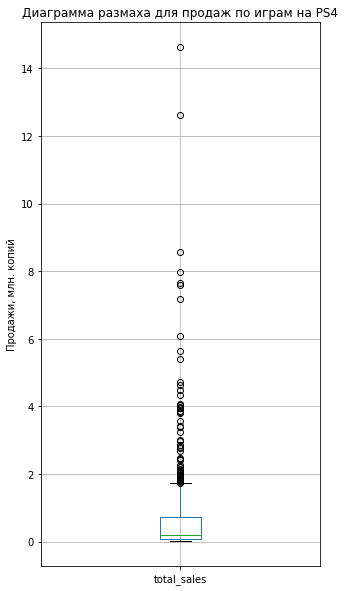

In [20]:
actual_period_data.query('platform == "PS4"').boxplot('total_sales', figsize=(5, 10))
plt.title('Диаграмма размаха для продаж по играм на PS4')
plt.ylabel('Продажи, млн. копий');

##### Диаграмма размаха для продаж на XBOX One

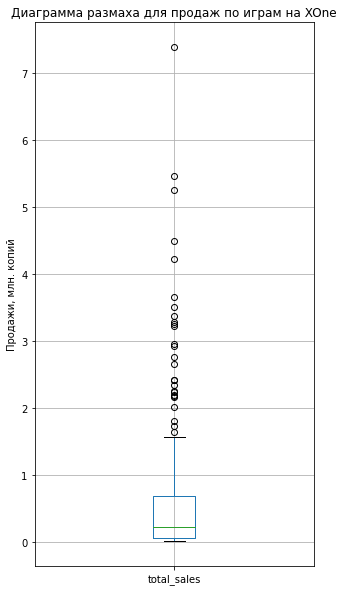

In [21]:
actual_period_data.query('platform == "XOne"').boxplot('total_sales', figsize=(5, 10))
plt.title('Диаграмма размаха для продаж по играм на XOne')
plt.ylabel('Продажи, млн. копий');

Большая часть игр даже на самых популярных платформах имеет продажи до 1-2 млн копий. Игр с продажами более 2 миллионов крайне немного.

##### Диаграмма размаха для продаж по всем платформам

Построим диаграмму размаха по всем платформам и взглянем на выбросы:

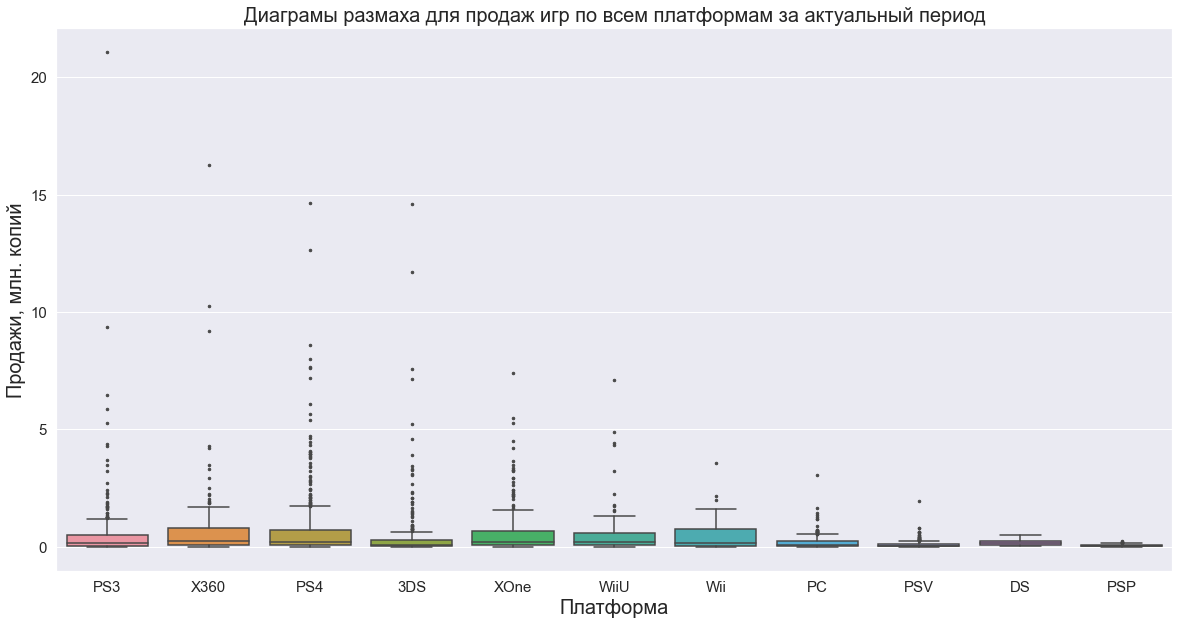

In [22]:
sns.set(rc={'figure.figsize': (20, 10), "font.size": 12})
b = sns.boxplot(x='platform', y='total_sales', data=actual_period_data, flierprops={'marker': '.'})
b.axes.set_title('Диаграмы размаха для продаж игр по всем платформам за актуальный период', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=20)
b.set_xlabel('Платформа', fontsize=20)
b.tick_params(labelsize=15)

При том, что большинство игр продаются тиражом до 2 млн копий, на некоторых платформах имеются игры с запредельным количеством продаж. На Playstation 3 есть игра, которая продалась тиражом более 20 млн, а на Xbox 360 - более 15 млн. Посмотрим, что это за игры. 

In [23]:
display(pd.DataFrame(actual_period_data.loc[actual_period_data
        .query('platform == "PS3"')['total_sales'].idxmax(), :]).T)
display(pd.DataFrame(actual_period_data.loc[actual_period_data
        .query('platform == "X360"')['total_sales'].idxmax(), :]).T)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


GTA V занимает 1 и 2 место по продажам всех игр среди всех платформ. Эта игра стала действительно успешной. 

Обрежем выбросы, чтобы посмотреть на распределение продаж по квартилям:

(0.0, 1.75)

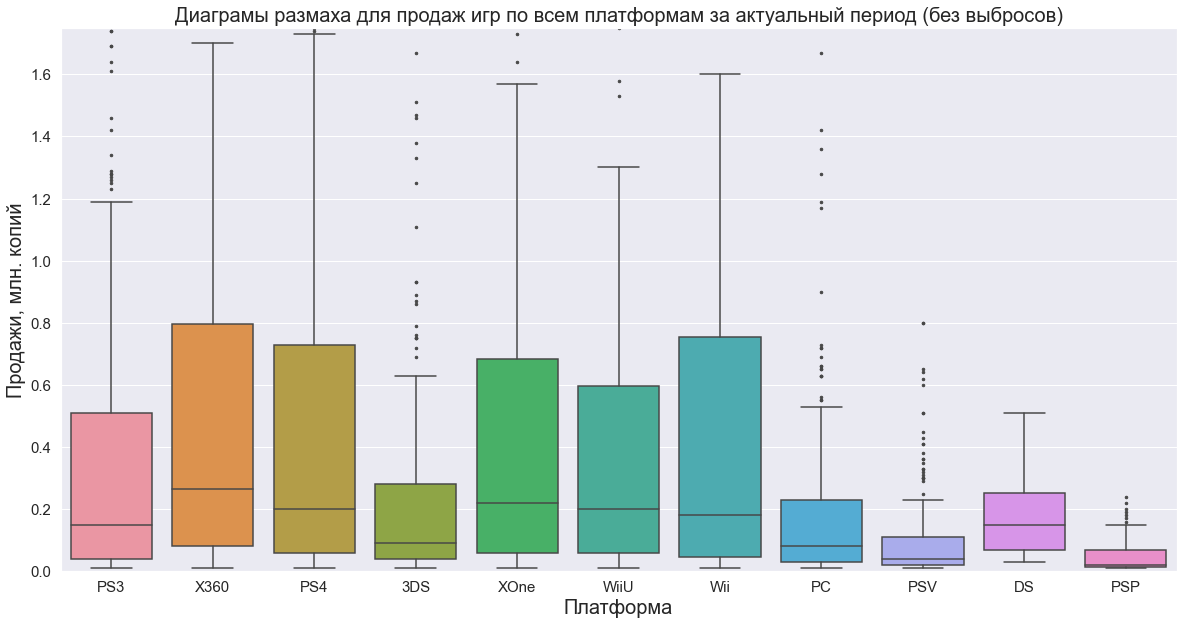

In [24]:
b = sns.boxplot(x='platform', y='total_sales', data=actual_period_data, flierprops={'marker': '.'})
b.axes.set_title('Диаграмы размаха для продаж игр по всем платформам за актуальный период (без выбросов)', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=20)
b.set_xlabel('Платформа', fontsize=20)
b.tick_params(labelsize=15)
plt.ylim(0, 1.75)

In [25]:
actual_period_data.groupby('platform')['total_sales'].count()

platform
3DS     303
DS        8
PC      189
PS3     345
PS4     392
PSP      67
PSV     358
Wii      23
WiiU    115
X360    186
XOne    247
Name: total_sales, dtype: int64

Медианные цифры продаж оказались выше всего на Xbox 360. Можем сказать, что по этому показателю Xbox 360 выиграл у своего прямого конкурента - Playstation 3. Это значит, что "обычные" игры (не такие хиты, как GTA V), чаще всего продавались большим тиражом именно на Xbox 360.  
Распределение продаж на Xbox One и Playstation 4 выглядит практически одинаково, разницы в продаже "обычных" игр почти нет. Однако, можно отметить, что отдельные хиты продаются сильнее именно на Playstation 4. Это видно по выбросам.

#### Корреляция между рейтингами и продажами

##### Диаграммы рассеяния и корреляция для оценок и продаж на Playstation 4

Посмотрим на корреляцию между оценками и продажами игр на платформе Playstation 4.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


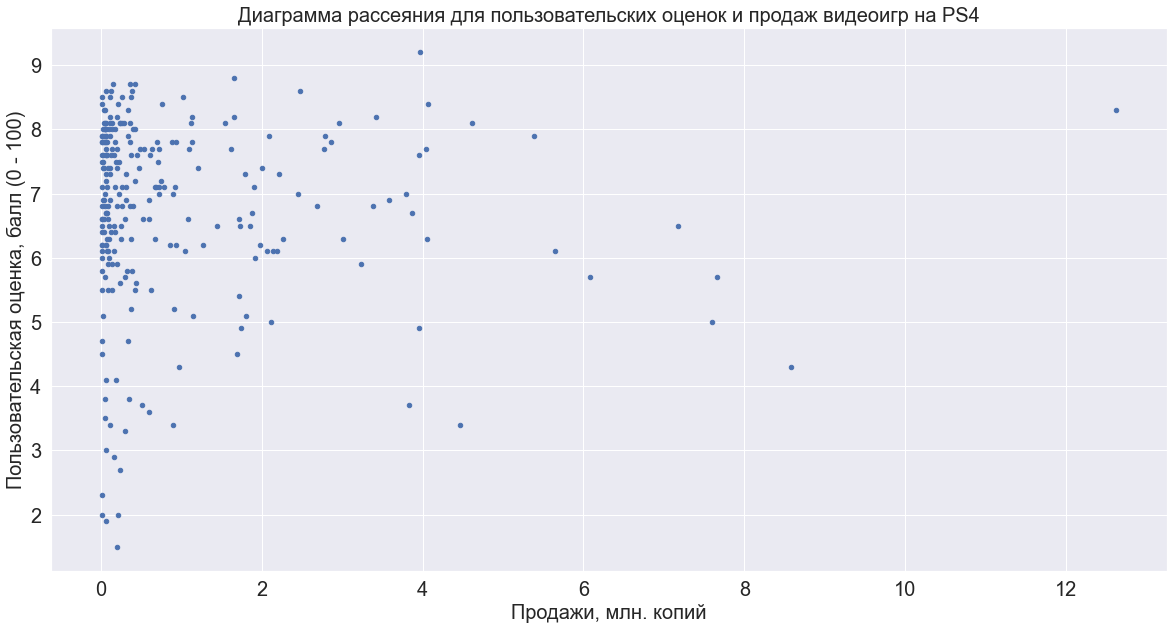

In [26]:
s = actual_period_data.query('platform == "PS4"').plot.scatter('total_sales', 'user_score')
s.axes.set_title('Диаграмма рассеяния для пользовательских оценок и продаж видеоигр на PS4', fontsize=20)
s.set_ylabel('Пользовательская оценка, балл (0 - 100)', fontsize=20)
s.set_xlabel('Продажи, млн. копий', fontsize=20)
s.tick_params(labelsize=20);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


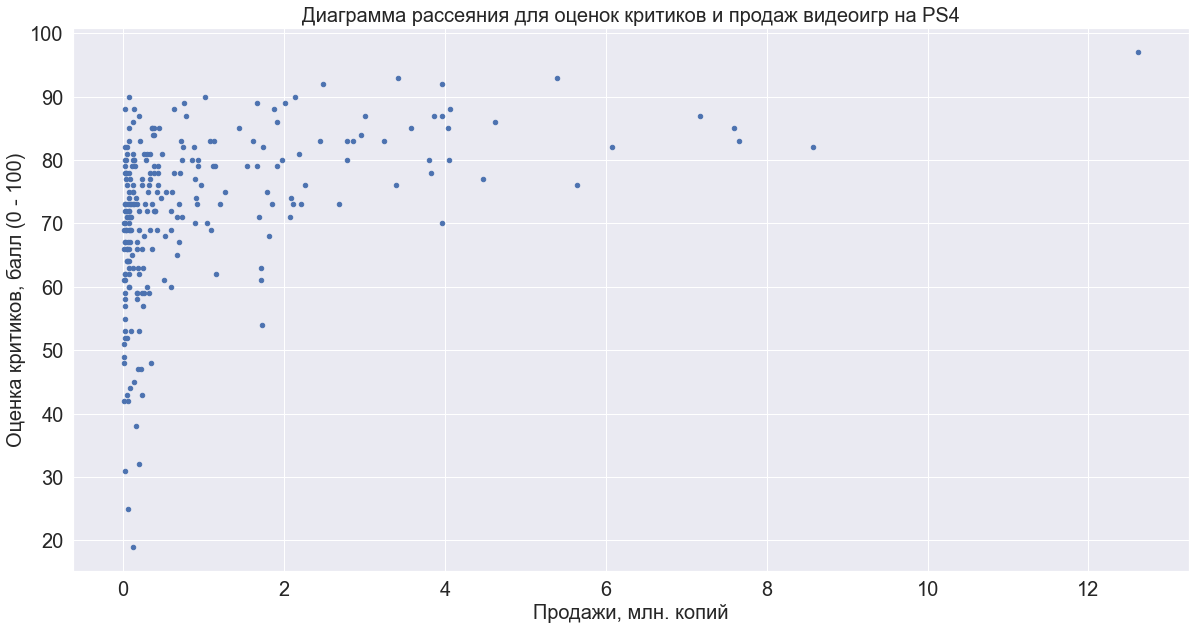

In [27]:
s = actual_period_data.query('platform == "PS4"').plot.scatter('total_sales', 'critic_score')
s.axes.set_title('Диаграмма рассеяния для оценок критиков и продаж видеоигр на PS4', fontsize=20)
s.set_ylabel('Оценка критиков, балл (0 - 100)', fontsize=20)
s.set_xlabel('Продажи, млн. копий', fontsize=20)
s.tick_params(labelsize=20);

In [28]:
user_score_corr_ps4 = (actual_period_data.query('platform == "PS4"')['total_sales']
                       .corr(actual_period_data.query('platform == "PS4"')['user_score']))
critic_score_corr_ps4 = (actual_period_data.query('platform == "PS4"')['total_sales']
                       .corr(actual_period_data.query('platform == "PS4"')['critic_score']))
print('Корреляция между пользовательскими оценками и продажами игр на PS4:', user_score_corr_ps4)
print('Корреляция между оценками критиков и продажами игр на PS4:', critic_score_corr_ps4)

Корреляция между пользовательскими оценками и продажами игр на PS4: -0.03195711020455643
Корреляция между оценками критиков и продажами игр на PS4: 0.40656790206178123


По диаграмме размаха и корреляции мы можем увидеть, что продажи игры совершенно не зависят от пользовательской оценки. Можем предположить, что это связано с тем, что очень большое влияние на продажи имеет рекламная кампания игры. У популярных издателей очень большой бюджет на рекламу, а существенную долю продаж игр составляют предзаказы. Даже, если игра будет посредственной, при хорошей рекламной кампании можно получить очень большие продажи. К тому же, не все игроки при покупке игры читают отзывы о ней.    
Связь между оценкой от критиков и продажами есть, но её нельзя назвать сильной. Однако, связь всё равно имеется по причине того, что оценки от критиков появляются до релиза игр. Если критики плохо оценят игру до релиза, это может уменьшить продажи игры, но как видим по графику, это происходит не так часто.

##### Диаграммы рассеяния и корреляция для оценок и продаж на платформах другого типа

На всякий случай проверим корреляцию на других платформах. Вдруг, будут какие-то отличия. Возьмём платформы другого типа, не домашнюю стационарную консоль. Для этого подойдут персональный компьютер и портативная платформа Nintendo 3DS.

Диаграммы рассеяния для PC:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


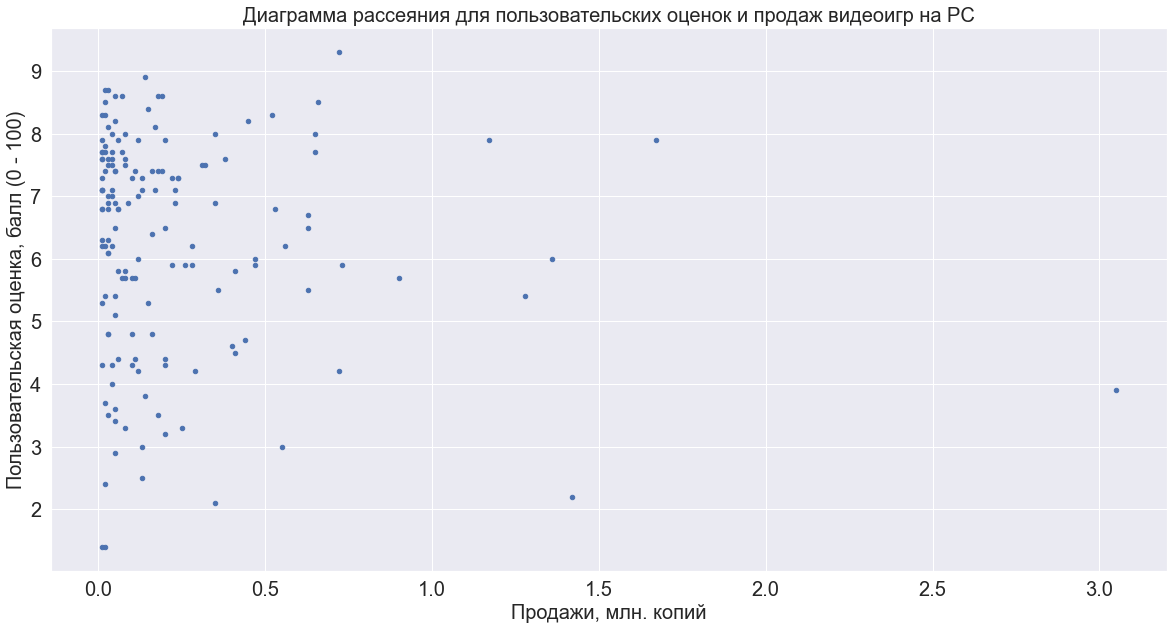

In [29]:
s = actual_period_data.query('platform == "PC"').plot.scatter('total_sales', 'user_score')
s.axes.set_title('Диаграмма рассеяния для пользовательских оценок и продаж видеоигр на PC', fontsize=20)
s.set_ylabel('Пользовательская оценка, балл (0 - 100)', fontsize=20)
s.set_xlabel('Продажи, млн. копий', fontsize=20)
s.tick_params(labelsize=20);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


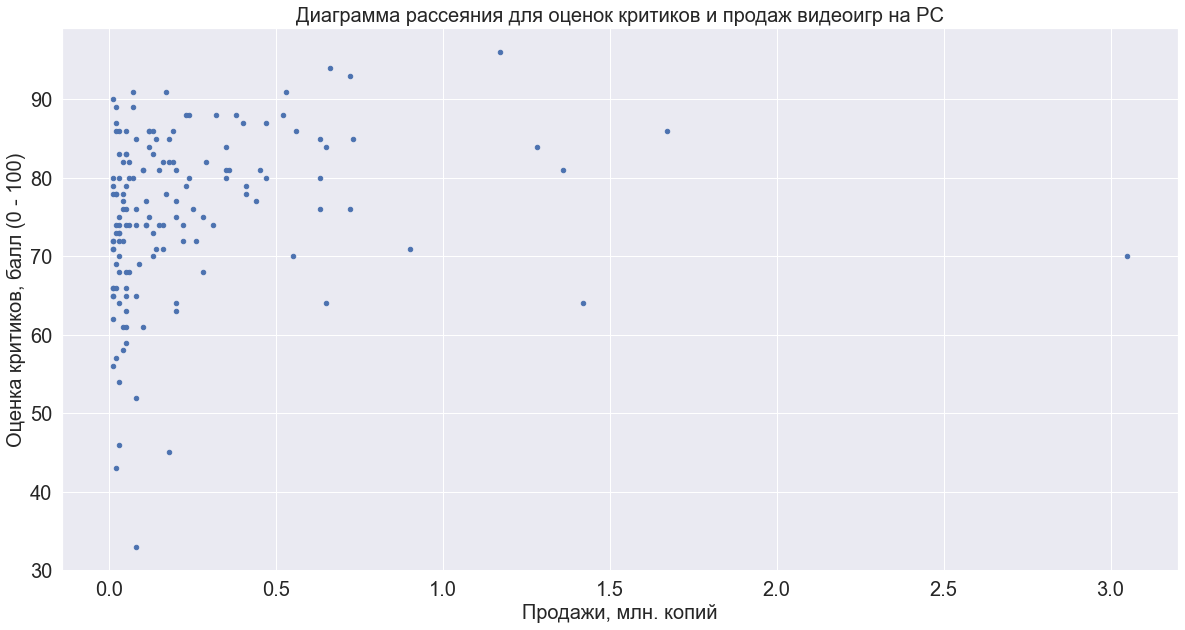

In [30]:
s = actual_period_data.query('platform == "PC"').plot.scatter('total_sales', 'critic_score')
s.axes.set_title('Диаграмма рассеяния для оценок критиков и продаж видеоигр на PC', fontsize=20)
s.set_ylabel('Оценка критиков, балл (0 - 100)', fontsize=20)
s.set_xlabel('Продажи, млн. копий', fontsize=20)
s.tick_params(labelsize=20);

Диаграммы рассеяния для Nintendo 3DS:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


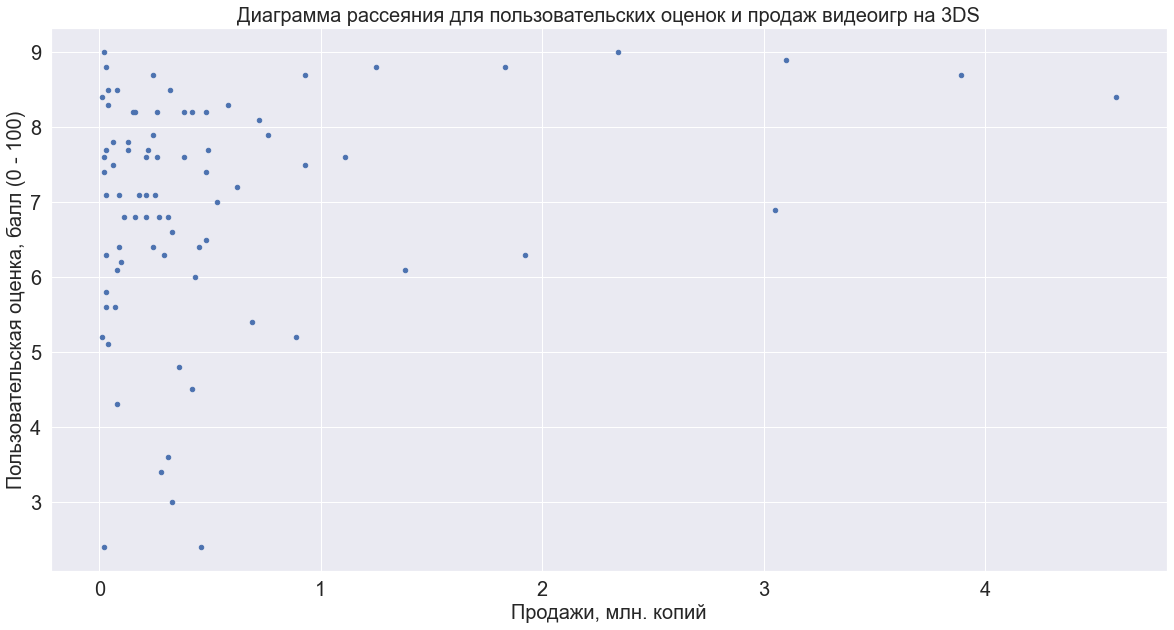

In [31]:
s = actual_period_data.query('platform == "3DS"').plot.scatter('total_sales', 'user_score')
s.axes.set_title('Диаграмма рассеяния для пользовательских оценок и продаж видеоигр на 3DS', fontsize=20)
s.set_ylabel('Пользовательская оценка, балл (0 - 100)', fontsize=20)
s.set_xlabel('Продажи, млн. копий', fontsize=20)
s.tick_params(labelsize=20);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


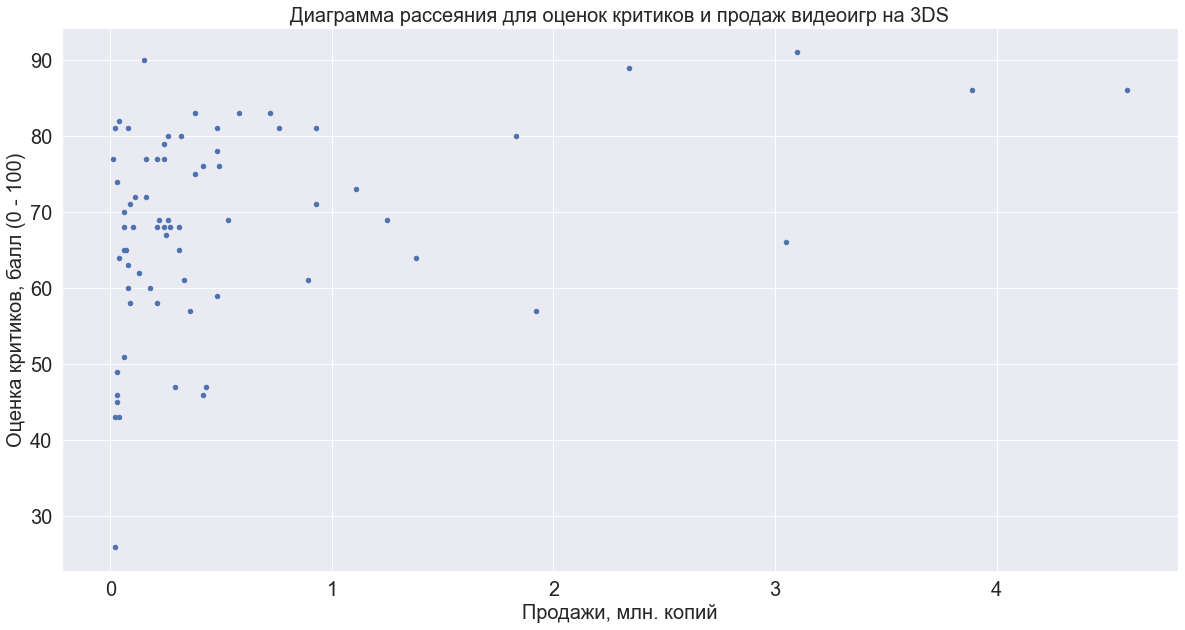

In [32]:
s = actual_period_data.query('platform == "3DS"').plot.scatter('total_sales', 'critic_score')
s.axes.set_title('Диаграмма рассеяния для оценок критиков и продаж видеоигр на 3DS', fontsize=20)
s.set_ylabel('Оценка критиков, балл (0 - 100)', fontsize=20)
s.set_xlabel('Продажи, млн. копий', fontsize=20)
s.tick_params(labelsize=20);

In [33]:
user_score_corr_pc = (actual_period_data.query('platform == "PC"')['total_sales']
                       .corr(actual_period_data.query('platform == "PC"')['user_score']))
critic_score_corr_pc = (actual_period_data.query('platform == "PC"')['total_sales']
                       .corr(actual_period_data.query('platform == "PC"')['critic_score']))
print('Корреляция между пользовательскими оценками и продажами игр на PC:', user_score_corr_pc)
print('Корреляция между оценками критиков и продажами игр на PC:', critic_score_corr_pc)

Корреляция между пользовательскими оценками и продажами игр на PC: -0.09384186952476747
Корреляция между оценками критиков и продажами игр на PC: 0.19603028294369368


In [34]:
user_score_corr_3ds = (actual_period_data.query('platform == "3DS"')['total_sales']
                       .corr(actual_period_data.query('platform == "3DS"')['user_score']))
critic_score_corr_3ds = (actual_period_data.query('platform == "3DS"')['total_sales']
                       .corr(actual_period_data.query('platform == "3DS"')['critic_score']))
print('Корреляция между пользовательскими оценками и продажами игр на 3DS:', user_score_corr_3ds)
print('Корреляция между оценками критиков и продажами игр на 3DS:', critic_score_corr_3ds)

Корреляция между пользовательскими оценками и продажами игр на 3DS: 0.24150411773563002
Корреляция между оценками критиков и продажами игр на 3DS: 0.3570566142288104


Показатели на Playstation 4 действительно немного отличаются от показателей на других платформах.  
На PC зависимости между пользовательскими оценками и продажами также практически нет, а зависимость продаж от оценок критиков ещё меньше, чем на PS4. Можем сделать вывод, что PC игроки практически не полагаются ни на чьи оценки, а предпочитают выбирать игры по другим критериям.  
В случае Nintendo 3DS имеется небольшая корреляция между пользовательскими оценками и продажами. Игроки на этой платформе чуть больше доверяют друг другу, чем игроки на других платформах, но всё равно зависимость очень мала. В случае оценок критиков, ситуация почти как на PS4. 

#### Распределение игр по жанрам

Посмотрим на распределения продаж игр разных жанров.

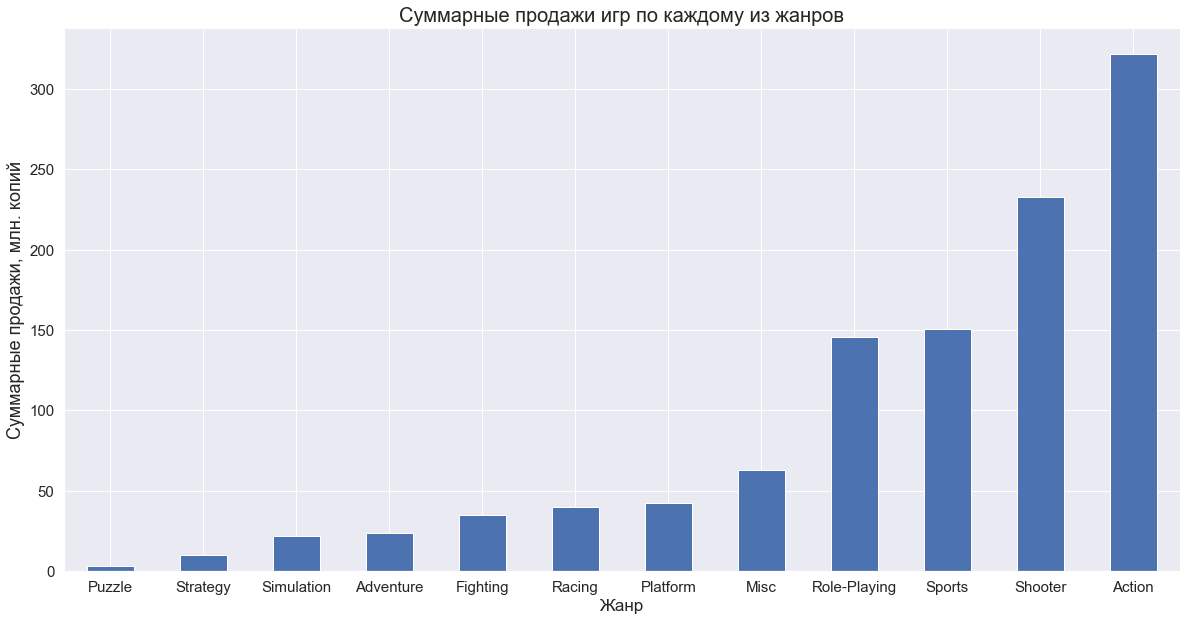

In [35]:
genres_plot = actual_period_data.groupby('genre')['total_sales'].sum().sort_values(ascending=True)
h = genres_plot.plot.bar(figsize=(20, 10))
h.tick_params(rotation=0, labelsize=15)
h.axes.set_title('Суммарные продажи игр по каждому из жанров', fontsize=20)
h.set_ylabel('Суммарные продажи, млн. копий', fontsize=18)
h.set_xlabel('Жанр', fontsize=17);


На графике можем увидеть, что самыми популярными жанрами являются экшн-игры и шутеры. Также можно отметить РПГ и спортивные симуляторы. Наименее популярными же являются головоломки и стратегии.

Посмотрим количество игр по каждому из жанров:

Text(0.5, 0, 'Жанр')

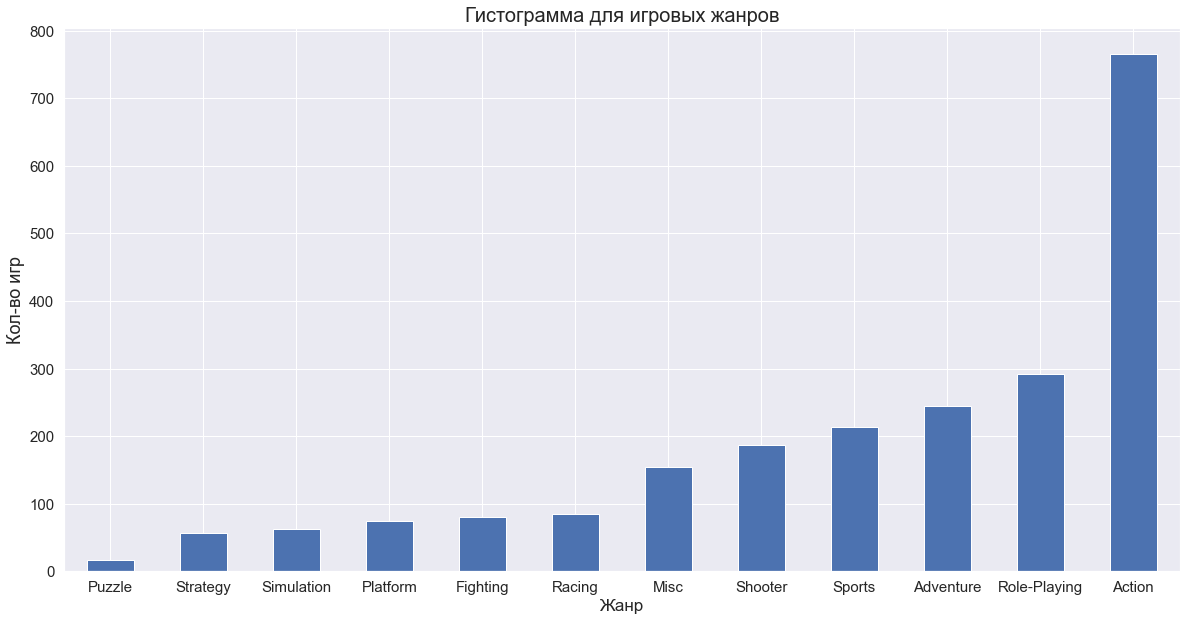

In [36]:
h = actual_period_data.groupby('genre')['total_sales'].count().sort_values().plot.bar(figsize=(20, 10))
h.tick_params(rotation=0, labelsize=15)
h.axes.set_title('Гистограмма для игровых жанров', fontsize=20)
h.set_ylabel('Кол-во игр', fontsize=18)
h.set_xlabel('Жанр', fontsize=17)

Количество игр сильно различается, поэтому сравним медианный доход от продаж:

Text(0.5, 0, 'Жанр')

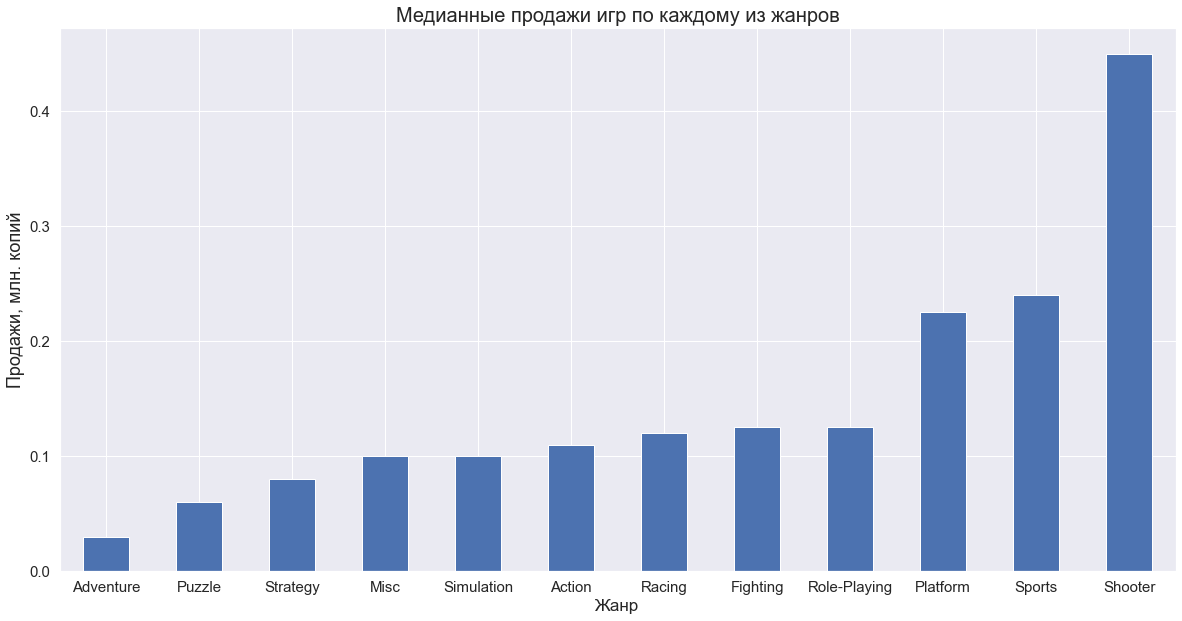

In [37]:
b = actual_period_data.groupby('genre')['total_sales'].median().sort_values().plot.bar(figsize=(20, 10))
b.tick_params(rotation=0, labelsize=15)
b.axes.set_title('Медианные продажи игр по каждому из жанров', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=18)
b.set_xlabel('Жанр', fontsize=17)

Тут ситуация немного отличается, можно сделать следующие выводы:
* Игр в жанре платформер не очень много, но по медианным продажам этот жанр находится на третьем месте.
* По этому графику видно, что игры в жанре экшн были на первом месте только из-за того, что это самый распространённый жанр: по медианным продажам экшны находятся в середине списка.
* Взглянув на оба графика можно сделать вывод, что самым успешным жанром является шутер. По суммарным продажам этот жанр занимает второе место, а по медианным - первое, с большим отрывом.
* Самым менее успешным жанром является "приключения". Игр в этом жанре достаточно много, но медианные продажи самые низкие.

### Составление портрета пользователя каждого региона

#### Североамериканский регион (NA)

##### Самые популярные платформы

Выведем самые популярные платформы по продажам в североамериканском регионе.

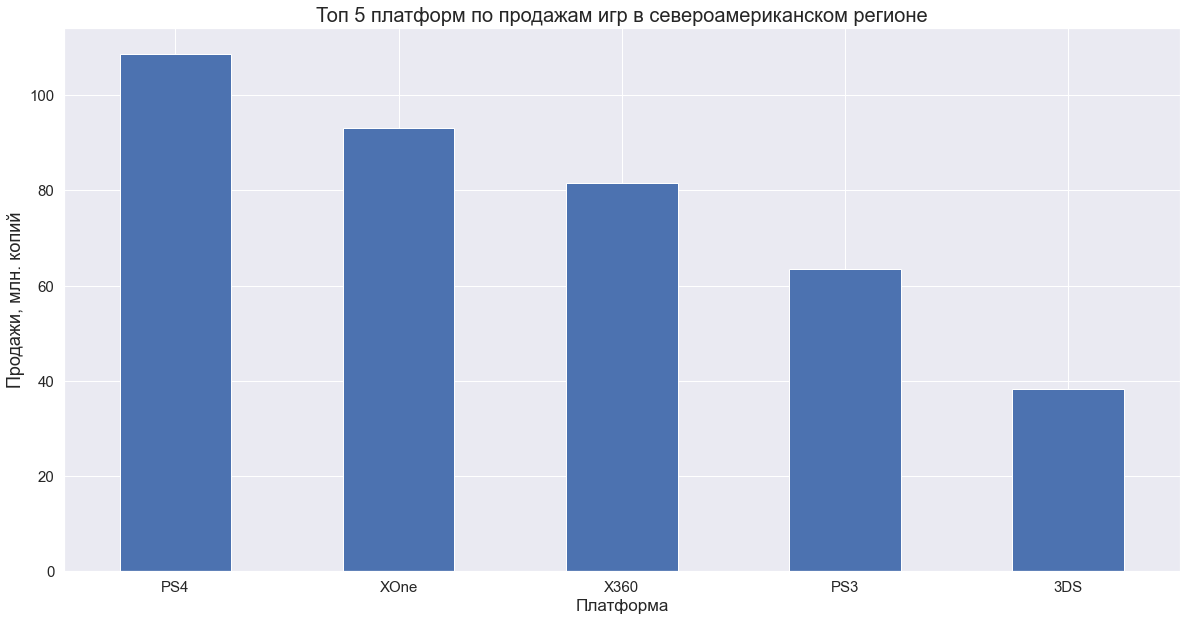

In [38]:
b = actual_period_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().plot.bar()
b.tick_params(rotation=0, labelsize=15)
b.axes.set_title('Топ 5 платформ по продажам игр в североамериканском регионе', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=18)
b.set_xlabel('Платформа', fontsize=17);

In [39]:
#создадим датафрейм с количеством продаж по платформам и долей от общих продаж
na_sales_table = pd.DataFrame(actual_period_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head())
na_sales_table['percentage'] = na_sales_table / na_sales_table.sum()
na_sales_table

,na_sales,percentage
platform,,
PS4,108.74,0.282280
XOne,93.12,0.241732
X360,81.66,0.211983
PS3,63.50,0.164841
3DS,38.20,0.099164


Самыми популярными платформами в североамериканском регионе за текущий актуальный период являются XBOX 360, Playstation 3, Playstation 4, XBOX One и Nintendo 3DS.

##### Самые популярные жанры

Построим такой же график, только с делением по жанрам.

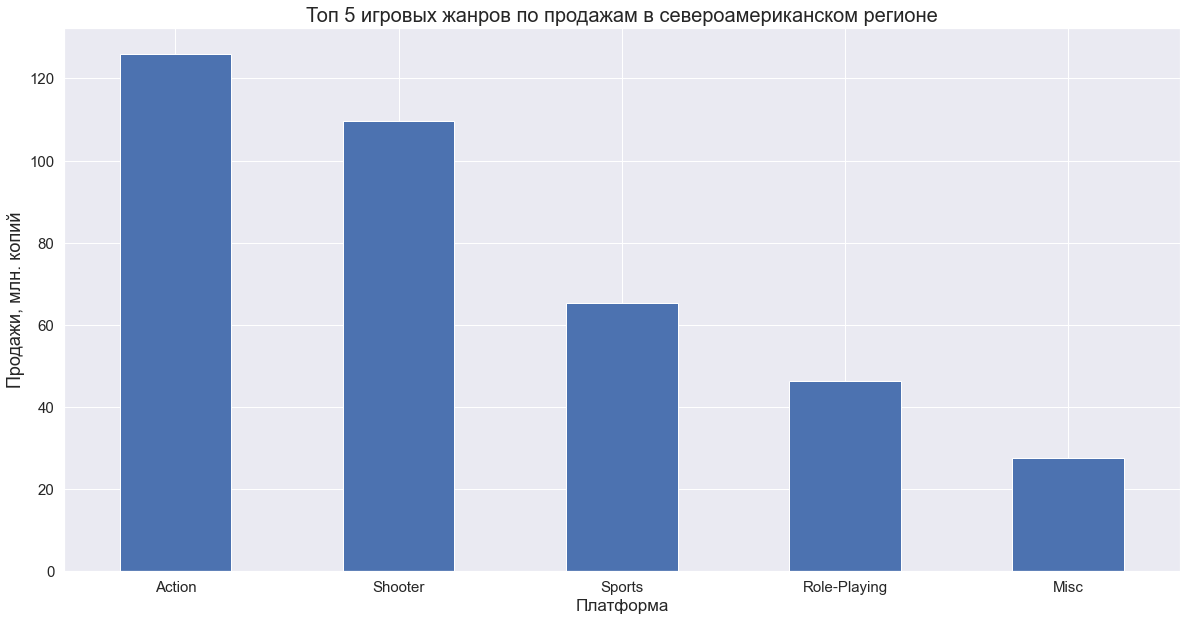

In [40]:
b = actual_period_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().plot.bar()
b.tick_params(rotation=0, labelsize=15)
b.axes.set_title('Топ 5 игровых жанров по продажам в североамериканском регионе', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=18)
b.set_xlabel('Платформа', fontsize=17);

Самыми популярными жанрами являются экшны, шутеры, спортивные симуляторы, РПГ и прочие.

##### Влияние рейтинга ESRB на продажи

Теперь сравним продажи игр с разными возрастными рейтингами.

In [41]:
actual_period_data.groupby('rating')['na_sales'].count()

rating
E            302
E10+         252
M            369
Not rated    977
T            333
Name: na_sales, dtype: int64

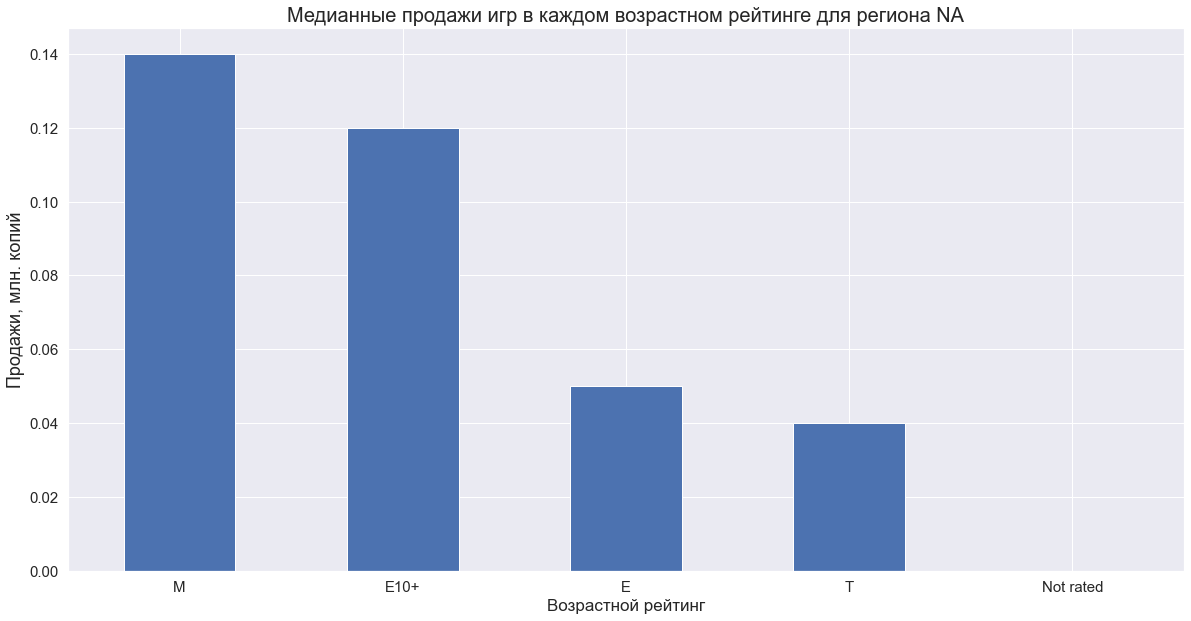

In [42]:
b = actual_period_data.groupby('rating')['na_sales'].median().sort_values(ascending=False).plot.bar()
b.tick_params(rotation=0, labelsize=15)
b.axes.set_title('Медианные продажи игр в каждом возрастном рейтинге для региона NA', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=18)
b.set_xlabel('Возрастной рейтинг', fontsize=17);

На графике можно увидеть медианные продажи для каждого рейтинга. Так как с рейтингом EC есть только одна игра, её можем не учитывать. Самыми популярными в регионе являются игры для взрослых (рейтинг M 17+).

#### Европейский регион (EU)

##### Самые популярные платформы

Посмотрим на те же графики в европейском регионе.

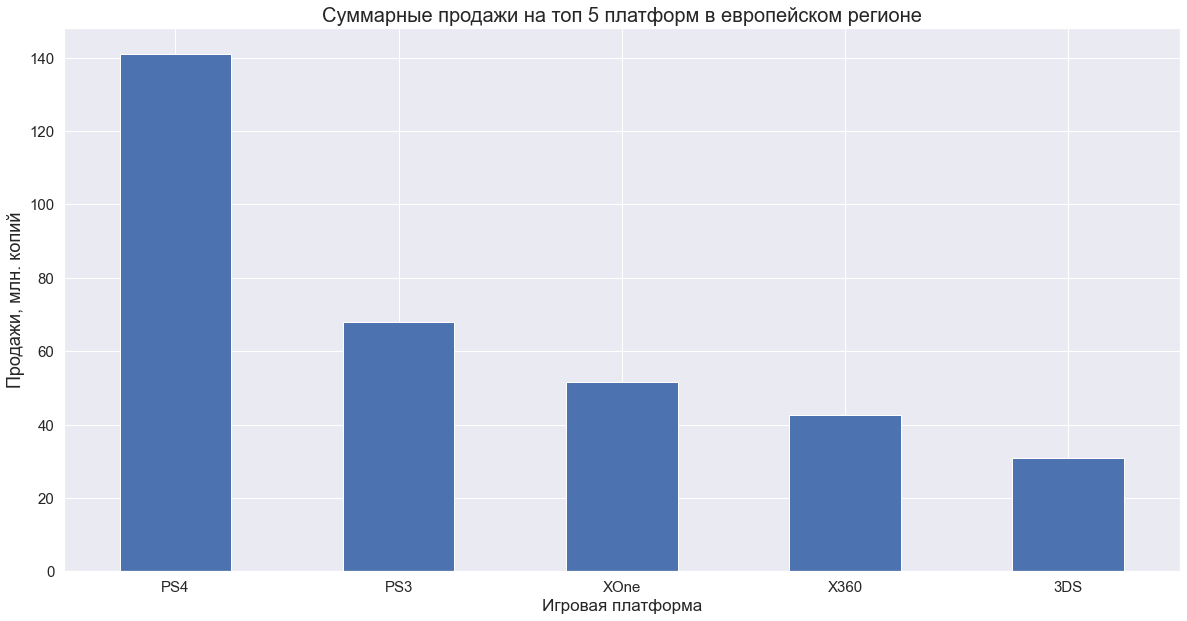

In [43]:
b = actual_period_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().plot.bar()
b.tick_params(rotation=0, labelsize=15)
b.axes.set_title('Суммарные продажи на топ 5 платформ в европейском регионе', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=18)
b.set_xlabel('Игровая платформа', fontsize=17);

In [44]:
#создадим датафрейм с количеством продаж по платформам и долей от общих продаж
eu_sales_table = pd.DataFrame(actual_period_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head())
eu_sales_table['percentage'] = eu_sales_table / eu_sales_table.sum()
eu_sales_table

,eu_sales,percentage
platform,,
PS4,141.09,0.422463
PS3,67.81,0.203042
XOne,51.59,0.154475
X360,42.52,0.127317
3DS,30.96,0.092703


В европейском регионе топ популярных платформ идентичен с североамериканскис

##### Самые популярные жанры

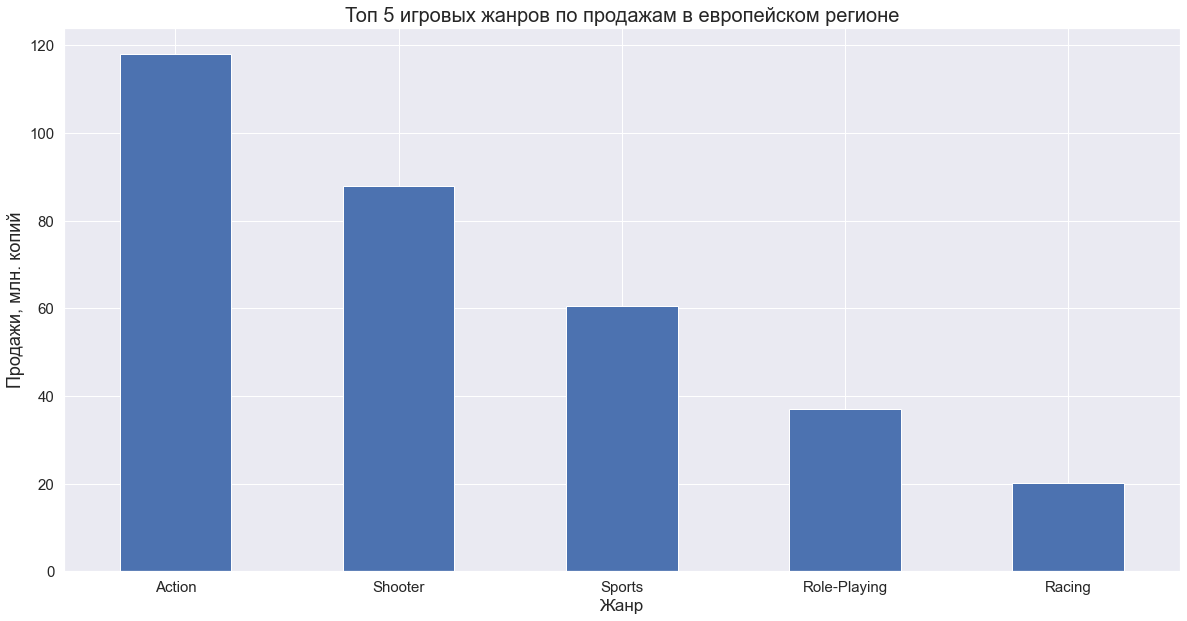

In [45]:
b = actual_period_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().plot.bar()
b.tick_params(rotation=0, labelsize=15)
b.axes.set_title('Топ 5 игровых жанров по продажам в европейском регионе', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=18)
b.set_xlabel('Жанр', fontsize=17);

Первые 4 места в топе жанров идентичны с североамериканским, но на 5 месте расположились гоночные игры. Европейцы предпочитают их больше, чем американцы.

##### Влияние рейтинга ESRB на продажи

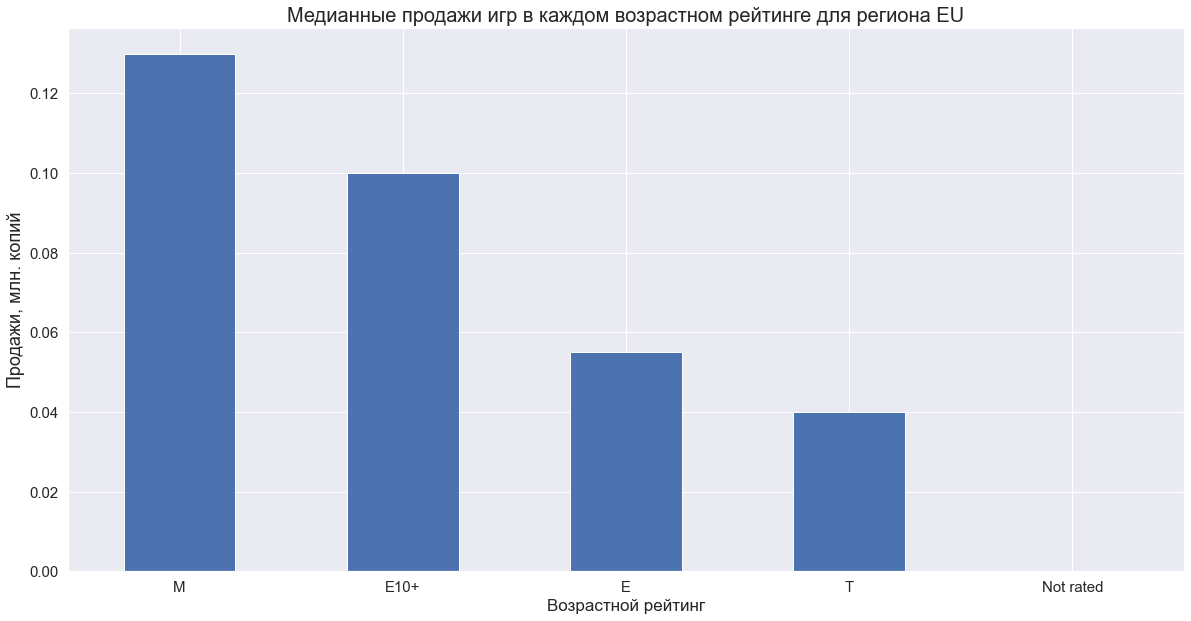

In [46]:
b = actual_period_data.groupby('rating')['eu_sales'].median().sort_values(ascending=False).plot.bar()
b.tick_params(rotation=0, labelsize=15)
b.axes.set_title('Медианные продажи игр в каждом возрастном рейтинге для региона EU', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=18)
b.set_xlabel('Возрастной рейтинг', fontsize=17);

В европейском регионе продажи по рейтингам практически совпадают с продажами в американском регионе. Пока закономерности не наблюдается.

#### Японский регион (JP)

##### Самые популярные платформы

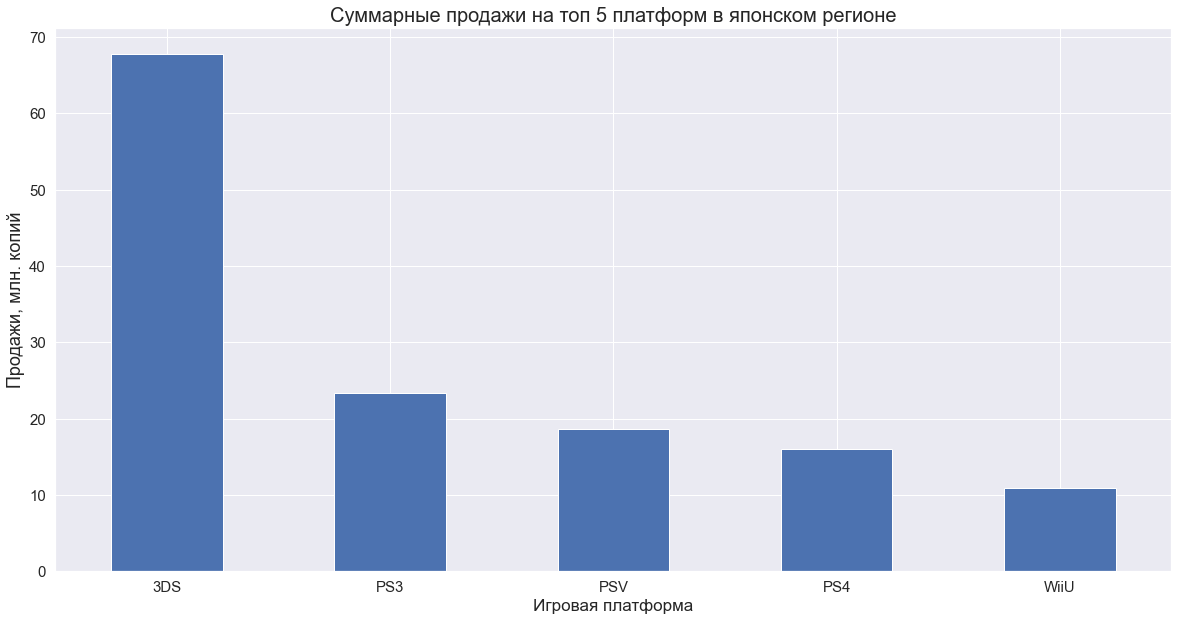

In [47]:
b = actual_period_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().plot.bar()
b.tick_params(rotation=0, labelsize=15)
b.axes.set_title('Суммарные продажи на топ 5 платформ в японском регионе', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=18)
b.set_xlabel('Игровая платформа', fontsize=17);

In [48]:
#создадим датафрейм с количеством продаж по платформам и долей от общих продаж
jp_sales_table = pd.DataFrame(actual_period_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head())
jp_sales_table['percentage'] = jp_sales_table / jp_sales_table.sum()
jp_sales_table

,jp_sales,percentage
platform,,
3DS,67.81,0.496449
PS3,23.35,0.170950
PSV,18.59,0.136101
PS4,15.96,0.116846
WiiU,10.88,0.079654


Топ платформ в японском регионе сильно отличается от остальных. В топе нет ни одной консоли от Microsoft, все 5 платформ являются японскими: 3 консоли от Sony и 2 от Nintendo. Японцы гораздо больше предпочитают отечественные платформы.

##### Самые популярные жанры

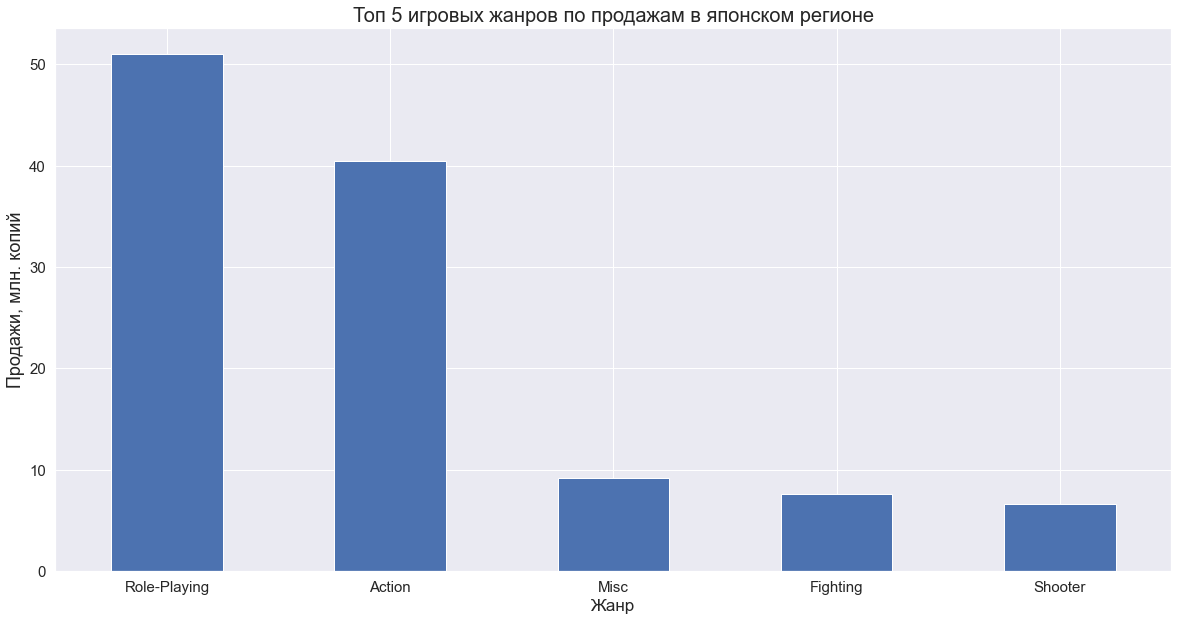

In [49]:
b = actual_period_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().plot.bar()
b.tick_params(rotation=0, labelsize=15)
b.axes.set_title('Топ 5 игровых жанров по продажам в японском регионе', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=18)
b.set_xlabel('Жанр', fontsize=17);

Топ жанров также отличается довольно сильно. Больше всего японцы предпочитают РПГ, также в топе появились файтинги и платформеры, которые не так популярны в других регионах.

##### Влияние рейтинга ESRB на продажи

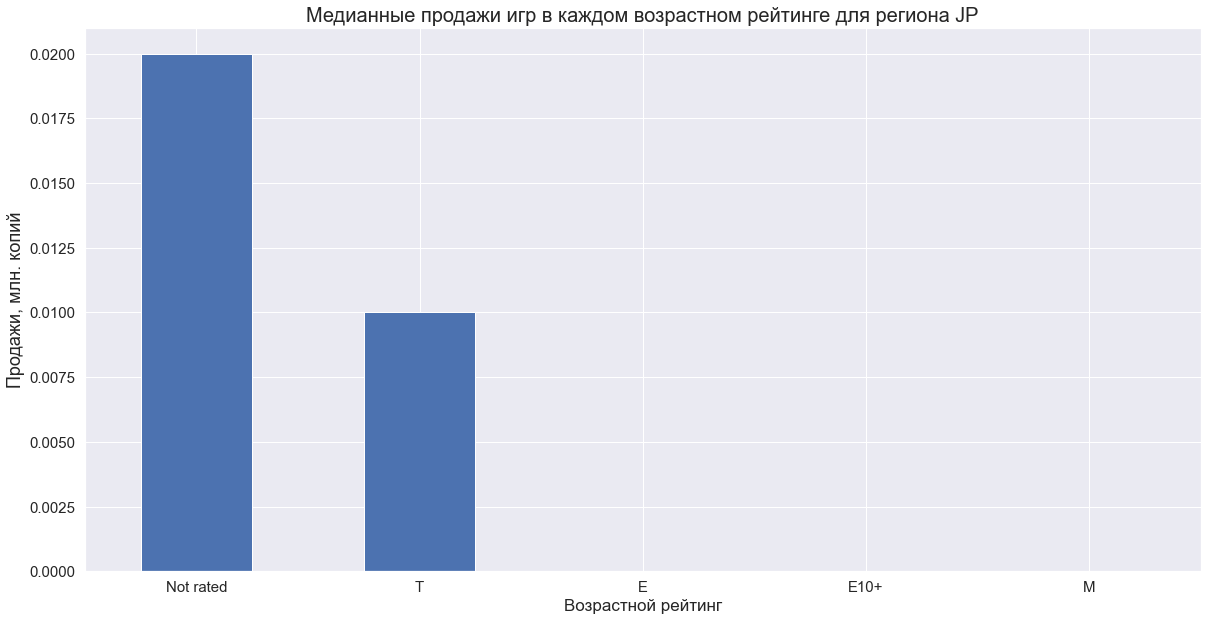

In [50]:
b = actual_period_data.groupby('rating')['jp_sales'].median().sort_values(ascending=False).plot.bar()
b.tick_params(rotation=0, labelsize=15)
b.axes.set_title('Медианные продажи игр в каждом возрастном рейтинге для региона JP', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=18)
b.set_xlabel('Возрастной рейтинг', fontsize=17);

В японском регионе медианные продажи везде кроме категорий "Not rated" и "T" равны нулю. Хотя в остальных регионах как раз категория "Not rated" была равна нулю. Посмотрим сумму и среднее продаж по рейтингам:

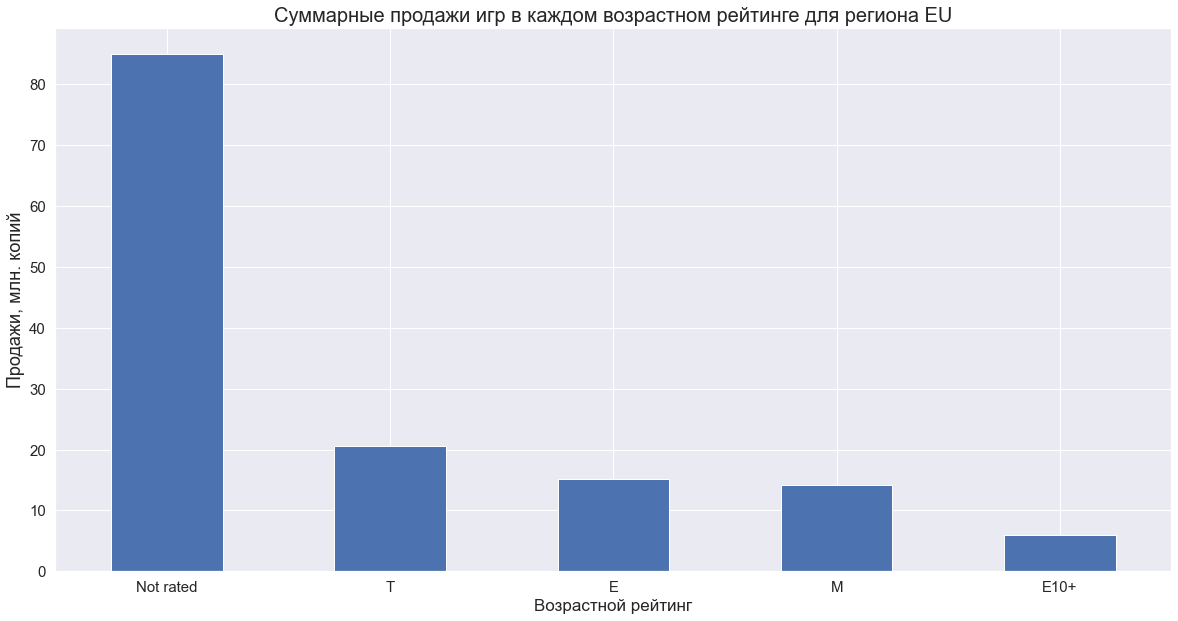

In [51]:
b = actual_period_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot.bar()
b.tick_params(rotation=0, labelsize=15)
b.axes.set_title('Суммарные продажи игр в каждом возрастном рейтинге для региона EU', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=18)
b.set_xlabel('Возрастной рейтинг', fontsize=17);

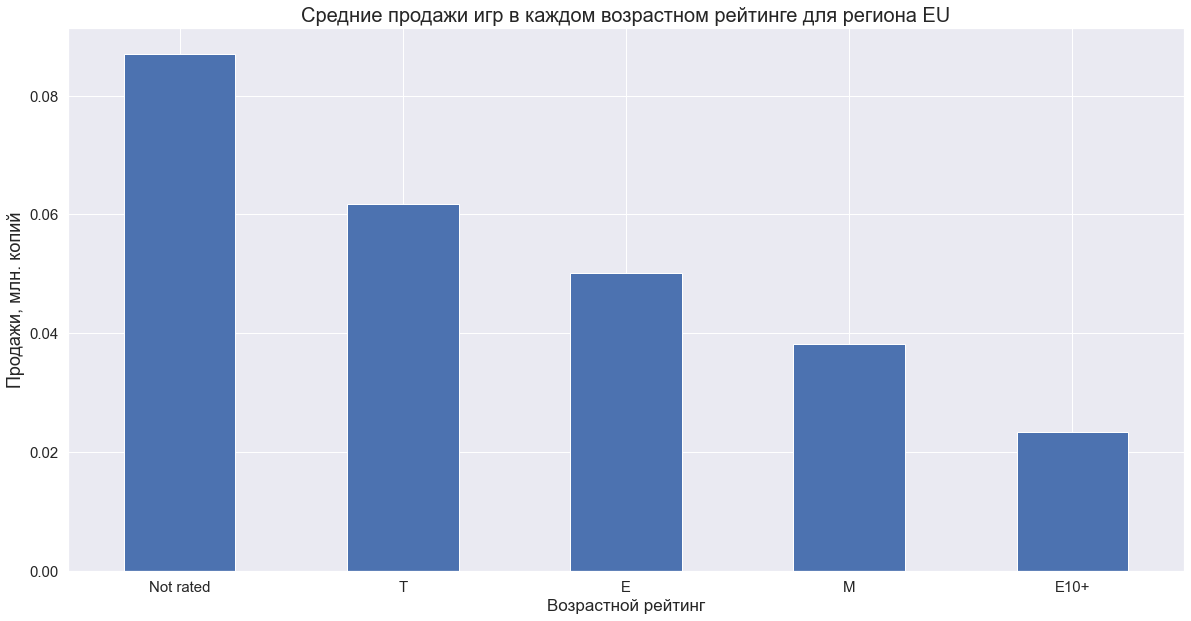

In [52]:
b = actual_period_data.groupby('rating')['jp_sales'].mean().sort_values(ascending=False).plot.bar()
b.tick_params(rotation=0, labelsize=15)
b.axes.set_title('Средние продажи игр в каждом возрастном рейтинге для региона EU', fontsize=20)
b.set_ylabel('Продажи, млн. копий', fontsize=18)
b.set_xlabel('Возрастной рейтинг', fontsize=17);

Тут также "лидирует" категория "Not rated". Посмотрим игры с самым большим количеством продаж в Японии, у которых нет рейтинга по ESRB:

In [53]:
actual_period_data.query('rating == "Not rated"').sort_values(by='jp_sales', ascending=False).head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Not rated,14.60
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,Not rated,3.44
412,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,0.09,0.00,3.18,0.01,NaN,NaN,Not rated,3.28
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Not rated,11.68
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,Not rated,3.32
563,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,0.00,0.00,2.68,0.00,NaN,NaN,Not rated,2.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,Not rated,7.55
694,Yokai Watch Busters,3DS,2015,Action,0.00,0.00,2.29,0.00,NaN,NaN,Not rated,2.29
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,Not rated,7.14
184,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,Not rated,5.22


In [54]:
actual_period_data.query('rating == "Not rated" and na_sales == 0')['na_sales'].count()

679

В топе большинство игр от японских разработчиков. В данной таблице много игр, которые продавались только в японском регионе, поэтому и получилась такая ситуация на графиках. Из этого можем сделать вывод, что японцы, также, как и с платформами, предпочитают японские игры.  
Также, можем предположить причину большинства пропусков в столбце с рейтингом. Так как ESRB - это американская организация, а многие из этих игр не продавались в американском регионе, у них просто нет рейтинга по ESRB. В Японии своя организация для установки рейтинга играм - CERO.  
Но, у игр, которые продавались в Северной Америке рейтинг должен быть, поэтому, тут, скорее всего, имела место быть какая-то ошибка при выгрузке данных.

### Проверка гипотез

#### Первая гипотеза

Сформулируем нулевую и альтернативную гипотезу:
* H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [55]:
#Проверка гипотезы
alpha = 0.05
test1 = st.ttest_ind(
    actual_period_data.query('platform == "XOne" and user_score.notna()')['user_score'], 
    actual_period_data.query('platform == "PC" and user_score.notna()')['user_score'])

if test1.pvalue > alpha:
    print('p-value:', test1.pvalue)
    print('Принимаем нулевую гипотезу.')
else:
    print('p-value:', test1.pvalue)
    print('Отклоняем нулевую гипотезу и принимаем альтернативную.')

p-value: 0.14012658403611647
Принимаем нулевую гипотезу.


Так как p-value больше установленного нами коэффицента альфа, можем считать, что средние пользовательские рейтинги на Xbox One и PC не отличаются.

#### Вторая гипотеза

Сформулируем нулевую и альтернативную гипотезу:
* H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
* H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [56]:
#Проверка гипотезы
test2 = st.ttest_ind(
    actual_period_data.query('genre == "Action" and user_score.notna()')['user_score'], 
    actual_period_data.query('genre == "Sports" and user_score.notna()')['user_score'])

if test2.pvalue > alpha:
    print('p-value:', test2.pvalue)
    print('Принимаем нулевую гипотезу.')
else:
    print('p-value:', test2.pvalue)
    print('Отклоняем нулевую гипотезу и принимаем альтернативную.')

p-value: 1.0517832389140023e-27
Отклоняем нулевую гипотезу и принимаем альтернативную.


Так как p-value меньше установленного нами коэффицента альфа, можем считать, что средние пользовательские рейтинги игр в жанрах Action и Sports отличаются.

### Общий вывод

Во время работы над проектом была проведена предобработка данных о продаже игр. Были заполнены некоторые пропуски и исправлены типы данных в столбцах. Был проведён исследовательский анализ данных, выбран актуальный период и самые потенциально прибыльные платформы. Ими оказались Playstation 4 и Xbox One.  
Также, была проверена корреляция между оценками и продажами игр: серьезной зависимости не было найдено. В результате проверки распределения продаж по жанрам были выявлены самые потенциально успешные и менее успешные жанры.  
По каждому региону был составлен портрет пользователя: вкусы европейцев и американцев оказались по большей части схожи, но у японцев предпочтения отличаются. Также сформулированы и проверены две гипотезы.  
В итоге, был отработан принцип работы с данными для прогнозирования продаж игр на следующий год: нашему магазину стоит по большей части закупать игры в жанре шутер на консоли PS4 и Xbox One. 